In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 20;


<IPython.core.display.Javascript object>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import time

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, classification_report
from yellowbrick.model_selection import FeatureImportances

import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style = 'white')

In [3]:
# data = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col='customerID')
data = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data.drop(columns=['customerID'])
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
data[data['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


There are `11` rows that does not have TotalCharges, and tenure is `zero`.
Drop them all

In [5]:
data.dropna(subset=['TotalCharges'], inplace=True)
parsed_shape = data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


Inspect data to check for remaining mission values and column with unique values

In [6]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [7]:
dataoveriew(data, 'Overview of the dataset')

Overview of the dataset:

Rows: 7032

Number of features: 20

Features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


View profile report to get more insight

In [8]:
# import pandas_profiling as pp
import ydata_profiling as pp

# profile = pp.ProfileReport(data)
# profile


### About Dataset

This data contains information about a fictitious telecom company that provided home phone and Internet services to 7,043 California residents in the third quarter. This information shows whether a customer has left, remained or opted to sign up for the service.

#### Variables

* CustomerID: A unique ID that identifies each customer.

* Gender: The customer’s gender: Male, Female

* Age: The customer’s current age, in years, at the time the fiscal quarter ended.

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Married (Partner): Indicates if the customer is married: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* Number of Dependents: Indicates the number of dependents that live with the customer.

* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Tenure: Indicates the total amount of months that the customer has been with the company.

* Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

# Feature Engineering: Picking preprocessing method
## Numerical values
* Using RobustScaler (median = 0, interquartile range (IQR) = 1) instead of StandardScaler (mean=0, std=1)

    Because tennure, monthlycharge, totalchanges are not gaussian distribution
    
## Categorical values
* OneHotEncoder

## Boolean values
* LabelEncoder

In [9]:
# Separate all binary + Categorical Values + Boolean values
#target column
target_col = ["Churn"]
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Y = data['Churn']
# X = data.copy().drop(columns=['Churn'])
# Y = data['Churn']
X = data.copy()

#Binary columns with 2 values
# ['gender',
#  'SeniorCitizen',
#  'Partner',
#  'Dependents',
#  'PhoneService',
#  'PaperlessBilling']
bin_cols = [x for x in X.nunique()[X.nunique() == 2].keys().tolist() if x not in target_col]

#categorical columns
#number of levels in feature to be a categorical feature
nlevels = 11
cat_cols = list(set(X.nunique()[X.nunique()<nlevels].keys().tolist() 
                    + X.select_dtypes(include='object').columns.tolist()))

# ['OnlineBackup',
#  'StreamingMovies',
#  'PaymentMethod',
#  'Contract',
#  'OnlineSecurity',
#  'DeviceProtection',
#  'TechSupport',
#  'StreamingTV',
#  'MultipleLines',
#  'InternetService']
cat_cols = [x for x in cat_cols if x not in target_col + bin_cols]

#numerical columns
# ['tenure', 'MonthlyCharges', 'TotalCharges']
num_cols = [x for x in X.columns if x not in cat_cols + bin_cols + target_col]


from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder


# Categorical Values with OneHotEncoder
# Apply one-hot encoder to each column with categorical data
X = pd.get_dummies(X, columns=cat_cols)


# Transform boolean value with LabelEncoder
label_encoder = LabelEncoder()
for bin_col in bin_cols:
    X[bin_col] = label_encoder.fit_transform(X[bin_col])
# gender: Female = 0, Male = 1, yes=1, no=0

# Transform numerical value with StandardScaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# X.isnull().sum()
X.shape

(7032, 41)

<AxesSubplot: >

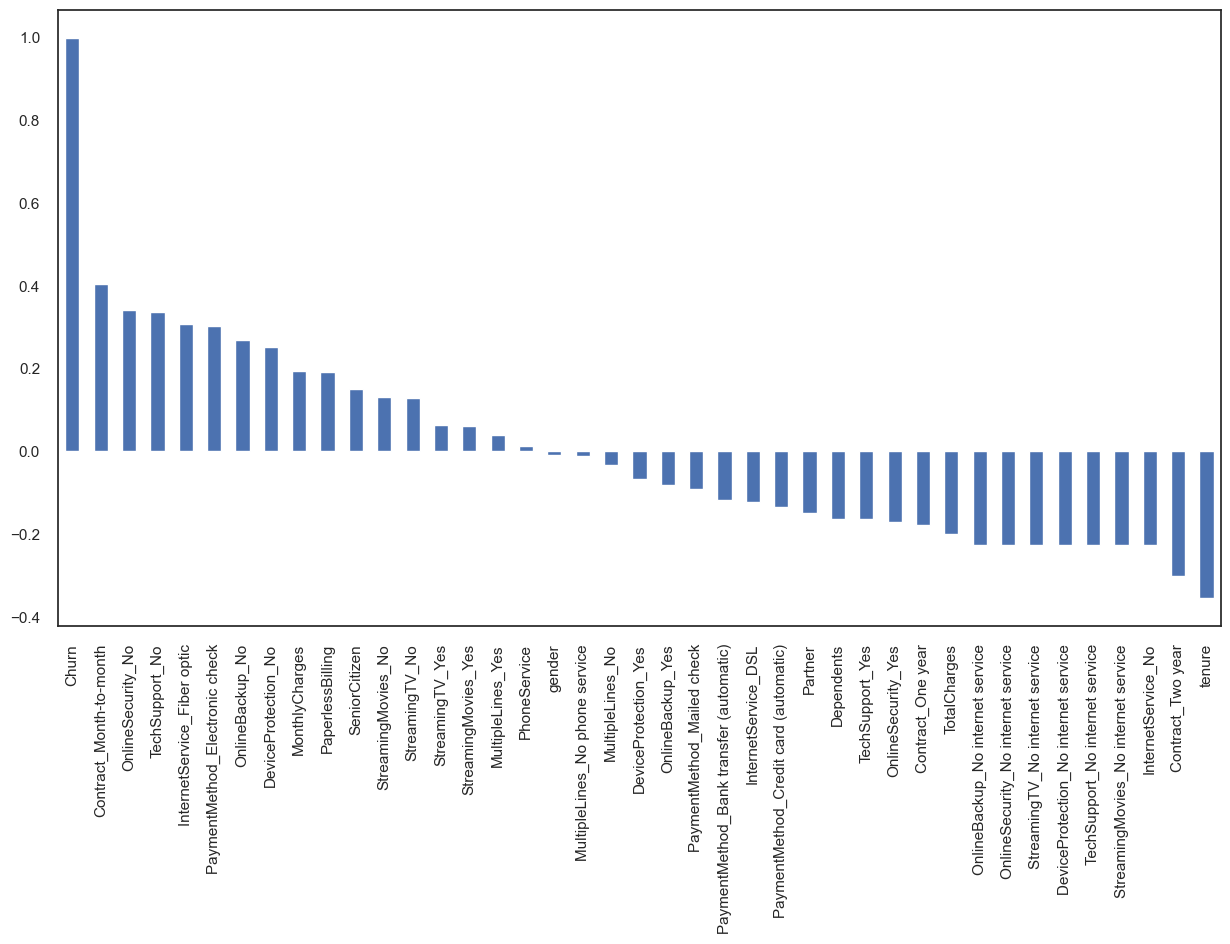

In [10]:

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
X.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


In [11]:
X.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                    -0.008545
MultipleLines_No phone service            -0.011691
MultipleLine

In [12]:
y = X['Churn']
X = X.copy().drop(columns=['Churn'])
X.shape

(7032, 40)

In [21]:
X_train_original, X_test, y_train_original, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# The data is imbalanced. Therefore I use smote method to oversample the data
oversample = SMOTE(random_state=0, k_neighbors=5)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_original, y_train_original)

In [22]:
import pickle
import os
path = "std_scaler_models"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(path)
    

In [23]:
import os
def model_performance(model, X_train, y_train, X_test, y_test, model_name="", show_stat=True, use_save_model=True):

    t0 = time.time()
    pickle_file_name = path + "/" + model_name + ".sav"
    
    use_model = model
    if use_save_model and os.path.exists(pickle_file_name):
        use_model = pickle.load(open(pickle_file_name, 'rb'))
    else:
        result = model.fit(X_train, y_train)
        use_model = model
        pickle.dump(model, open(pickle_file_name, 'wb'))
    training_time_seconds = time.time() - t0
    prediction_test = use_model.predict(X_test)
    # Print the prediction accuracy
    # print ("accuracy score: ", accuracy_score(y_test, prediction_test))
    # print ("f1 score: ", f1_score(y_test, prediction_test))


    #confusion matrix
    conf_matrix = confusion_matrix(y_test, prediction_test)
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test, prediction_test) 
    if show_stat:
        print("Model name: ", model_name)
        print('Algorithm:', type(model).__name__)
        print(classification_report(y_test, prediction_test, digits=4))
        print("Area under the roc curve:", model_roc_auc,"\n")

        ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g')
        ax.set_title('Confusion Matrix\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values (True Label) ');

        ax.xaxis.set_ticklabels(['Not Churn','Churn'])
        ax.yaxis.set_ticklabels(['Not Churn','Churn'])
        plt.show()

        #create ROC curve
        probabilities = use_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test,  probabilities)
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        plt.show()
        
        try:

        # viz = FeatureImportances(model, topn=10)
            viz = FeatureImportances(use_model, relative=False)

            viz.fit(X_test, y_test)
            viz.show()
        except:
            pass
        
    accuracy = accuracy_score(y_test, prediction_test)
    recallscore = recall_score(y_test, prediction_test)
    precision = precision_score(y_test, prediction_test)
    roc_auc = model_roc_auc
    f1score = f1_score(y_test, prediction_test) 
    df = pd.DataFrame({"Model"           : [model_name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Training Time(s)"         : [training_time_seconds],
                      })
    return df

In [24]:
def ml_classification(show_stat=False):
    performances_df = pd.DataFrame() 
    random_state = 50
    classifiers = []
    lg_params = {'solver': 'liblinear', 'penalty': 'l2', 'C': 69.51927961775606}
#     classifiers.append(dict(model=LogisticRegression(max_iter=10000),name='LogisticRegression'))
    classifiers.append(dict(model=LogisticRegression(max_iter=10000, **lg_params),name='LogisticRegression'))
    
    dt_params = {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
    classifiers.append(dict(model=DecisionTreeClassifier(random_state = random_state, splitter = "best", **dt_params), 
                            name='DecisionTreeClassifier'))
#     classifiers.append(dict(model=RandomForestClassifier(n_estimators = 100, random_state = random_state,max_depth = 9, criterion = "gini"), 
#                             name='RandomForestClassifier'))
    
#     classifiers.append(dict(model=RandomForestClassifier(n_estimators = 700, random_state = random_state, 
#                                                          min_samples_leaf=1, min_samples_split=2,
#                                                          max_depth = 25, criterion = "gini", bootstrap=False, max_features='sqrt'), 
#                             name='RandomForestClassifier'))
    rf_params = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 14} 
    classifiers.append(dict(model=RandomForestClassifier(criterion = "gini", random_state = random_state, **rf_params), 
                        name='RandomForestClassifier'))
    

#     classifiers.append(dict(model=GaussianNB(priors=None),name='GaussianNB'))
    
#     classifiers.append(dict(model=SVC(C=1.0, kernel='linear', probability=True, random_state=random_state), 
#                             name='SVC (linear)'))
    classifiers.append(dict(model=SVC(C=2.6, kernel='linear', probability=True, gamma=0.001, random_state=random_state), 
                            name='SVC (linear)'))
    
#     classifiers.append(dict(model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#                                 colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
#                                 max_depth=7, min_child_weight=1, missing=1, n_estimators=100,
#                                 n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#                                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1) , 
#                             name='XGBoost'))

    # show how default model behave the best
#     classifiers.append(dict(model=AdaBoostClassifier(random_state=random_state ), 
#                             name='AdaBoost'))
    classifiers.append(dict(model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=random_state,learning_rate=1, n_estimators=50), 
                            name='AdaBoost'))
#     classifiers.append(dict(model=AdaBoostClassifier(random_state=random_state, learning_rate=1.2, n_estimators=500), 
#                         name='AdaBoost'))

#     classifiers.append(dict(model=GradientBoostingClassifier(random_state=random_state), 
#                             name='GradientBoost'))
    
    
    
    num_rfe_features_to_select = 15
    rfe = RFE(LogisticRegression(max_iter=10000), n_features_to_select=num_rfe_features_to_select, step=1)
    rfe = rfe.fit(X_train_original, y_train_original.values.ravel())

    #identified columns Recursive Feature Elimination
    idc_rfe = pd.DataFrame({"rfe_support": rfe.support_,
                            "columns": X_train_original.columns,
                            "ranking": rfe.ranking_,
                           })

    cols_rfe = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
    for classifier in classifiers:
        # classifier and fitting
        model = classifier['model']
        name = classifier['name']
        df = model_performance(model, X_train_original, y_train_original, X_test, y_test, name, show_stat=show_stat)
        performances_df = performances_df.append(df)
        
        name = classifier['name'] + ' (SMOTE)'
        df = model_performance(model, X_train_smote, y_train_smote, X_test, y_test, name, show_stat=show_stat)
        performances_df = performances_df.append(df)
        
        ## RFE
        if True: #type(model).__name__ in ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']:

#             name = classifier['name'] + ' (RFE)'
#             df = model_performance(model, X_train_original[cols_rfe], y_train_original, X_test[cols_rfe], y_test, name, show_stat=show_stat)
#             performances_df = performances_df.append(df)

            ## SMOTE + RFE

            name = classifier['name'] + ' (SMOTE RFE)'
            df = model_performance(model, X_train_smote[cols_rfe], y_train_smote, X_test[cols_rfe], y_test, name, show_stat=show_stat)
            performances_df = performances_df.append(df)
        
    return performances_df        
                       

Model name:  LogisticRegression
Algorithm: LogisticRegression
              precision    recall  f1-score   support

           0     0.8550    0.9107    0.8820      1042
           1     0.6869    0.5589    0.6163       365

    accuracy                         0.8195      1407
   macro avg     0.7709    0.7348    0.7491      1407
weighted avg     0.8114    0.8195    0.8131      1407

Area under the roc curve: 0.7348263350248468 



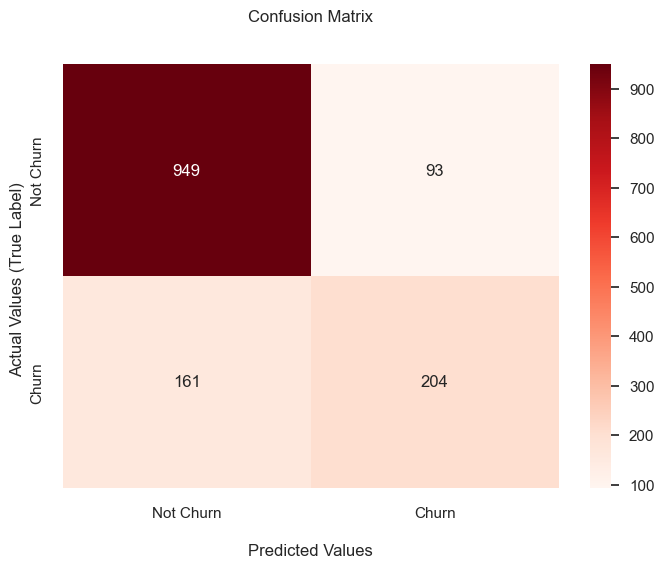

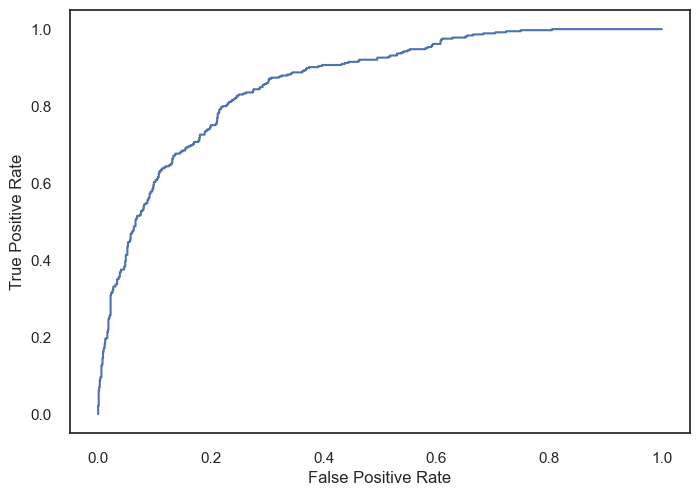

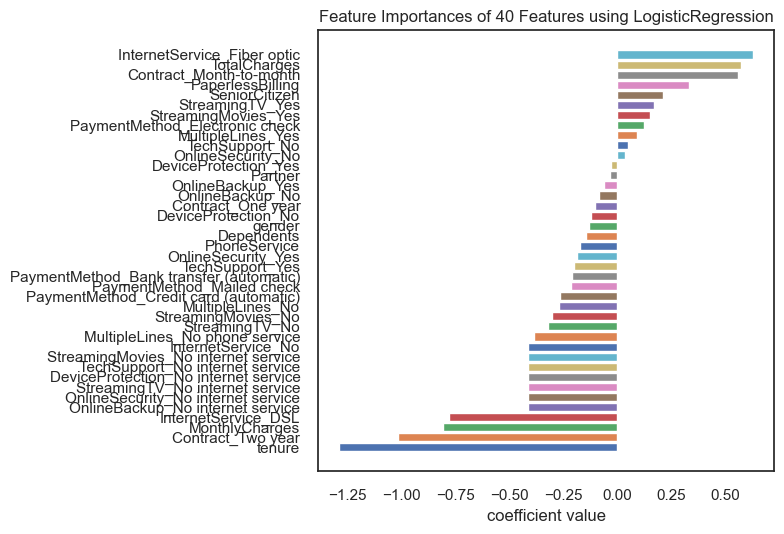

Model name:  LogisticRegression (SMOTE)
Algorithm: LogisticRegression
              precision    recall  f1-score   support

           0     0.8855    0.8464    0.8656      1042
           1     0.6107    0.6877    0.6469       365

    accuracy                         0.8053      1407
   macro avg     0.7481    0.7671    0.7562      1407
weighted avg     0.8142    0.8053    0.8088      1407

Area under the roc curve: 0.7670601845765519 



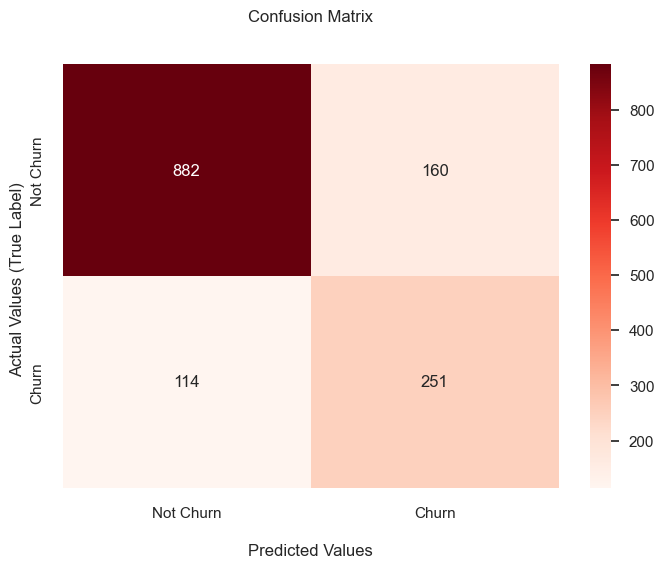

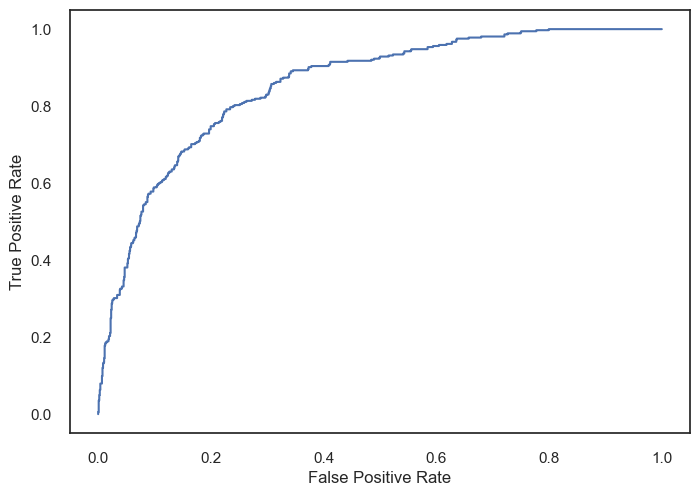

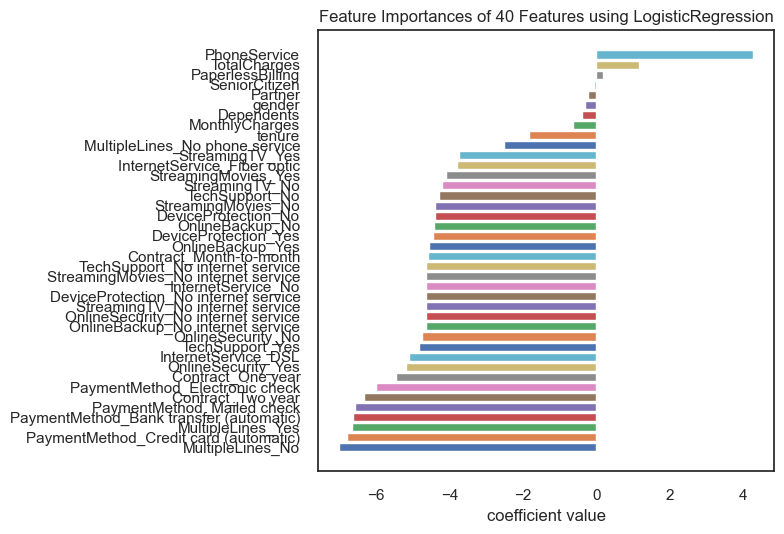

Model name:  LogisticRegression (SMOTE RFE)
Algorithm: LogisticRegression
              precision    recall  f1-score   support

           0     0.9246    0.7418    0.8232      1042
           1     0.5289    0.8274    0.6453       365

    accuracy                         0.7640      1407
   macro avg     0.7268    0.7846    0.7343      1407
weighted avg     0.8220    0.7640    0.7771      1407

Area under the roc curve: 0.7846199353193279 



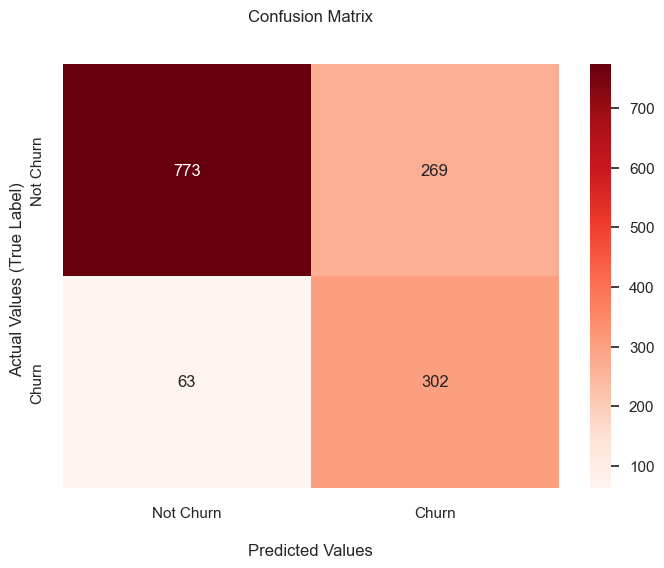

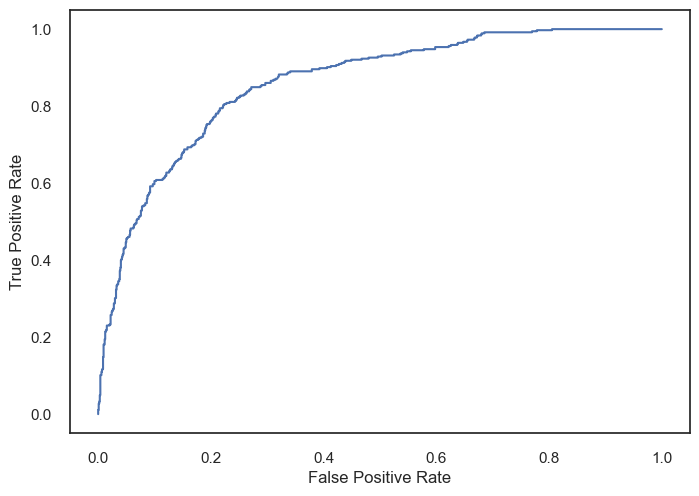

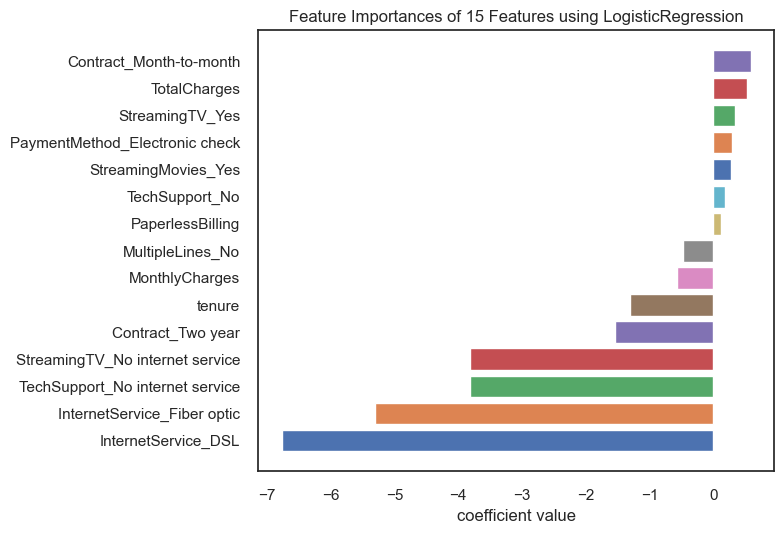

Model name:  DecisionTreeClassifier
Algorithm: DecisionTreeClassifier
              precision    recall  f1-score   support

           0     0.8426    0.8580    0.8502      1042
           1     0.5723    0.5425    0.5570       365

    accuracy                         0.7761      1407
   macro avg     0.7074    0.7002    0.7036      1407
weighted avg     0.7725    0.7761    0.7741      1407

Area under the roc curve: 0.7002156022401599 



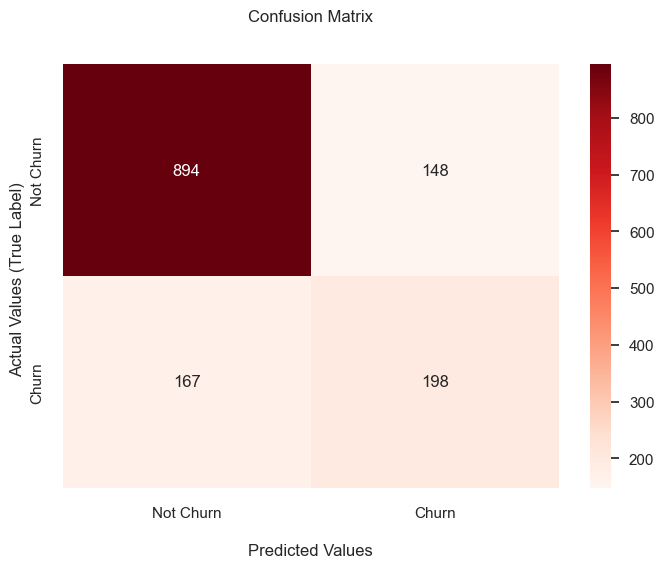

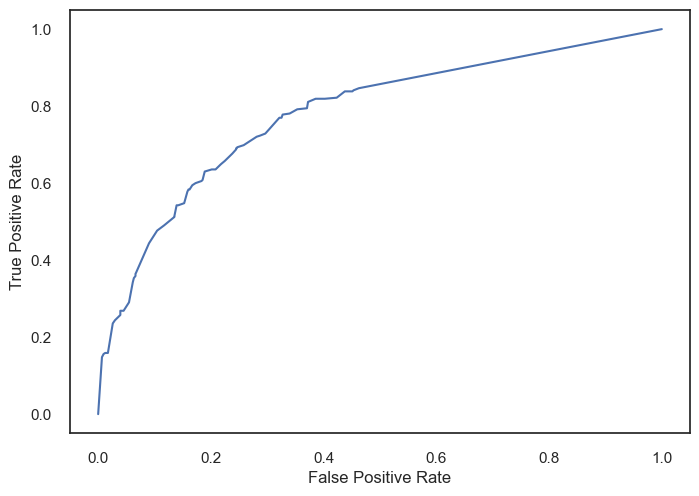

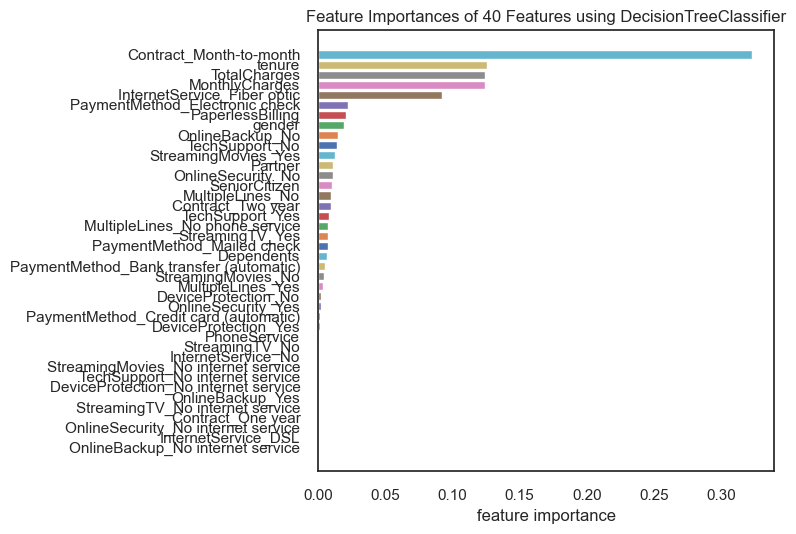

Model name:  DecisionTreeClassifier (SMOTE)
Algorithm: DecisionTreeClassifier
              precision    recall  f1-score   support

           0     0.8673    0.7716    0.8167      1042
           1     0.5042    0.6630    0.5728       365

    accuracy                         0.7434      1407
   macro avg     0.6857    0.7173    0.6947      1407
weighted avg     0.7731    0.7434    0.7534      1407

Area under the roc curve: 0.7173033944206347 



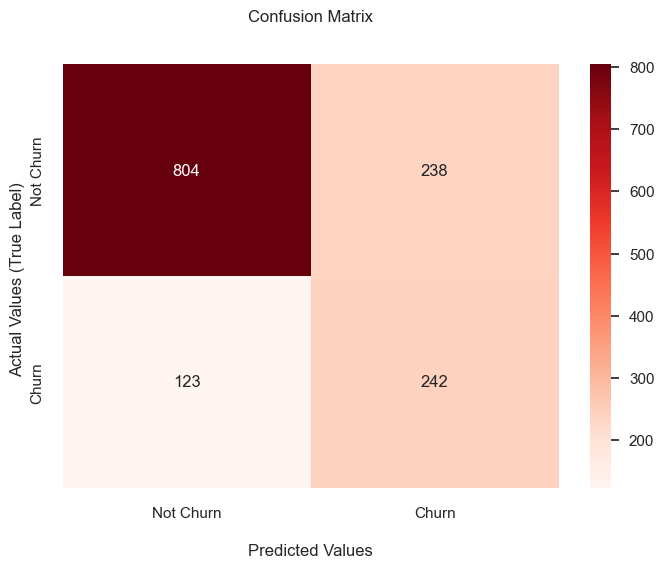

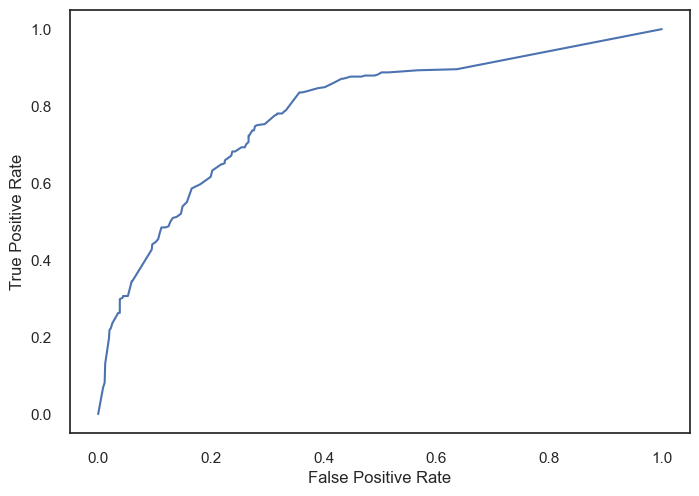

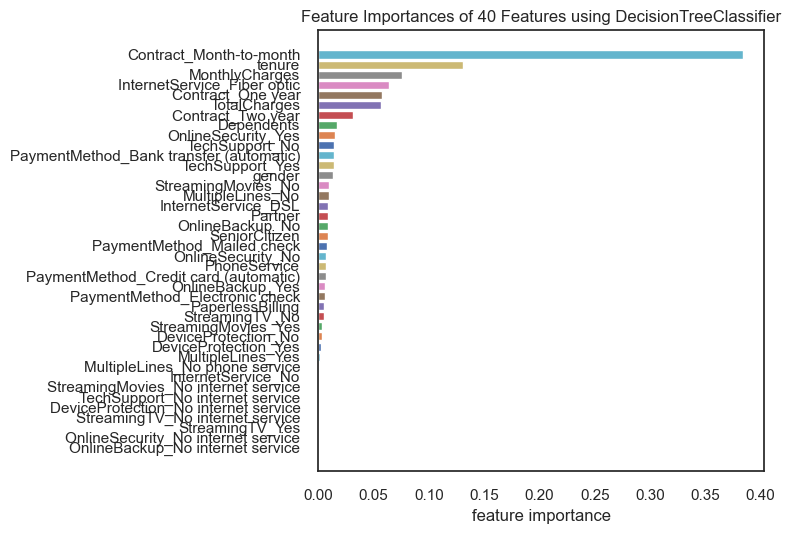

Model name:  DecisionTreeClassifier (SMOTE RFE)
Algorithm: DecisionTreeClassifier
              precision    recall  f1-score   support

           0     0.8875    0.7726    0.8261      1042
           1     0.5260    0.7205    0.6081       365

    accuracy                         0.7591      1407
   macro avg     0.7068    0.7466    0.7171      1407
weighted avg     0.7938    0.7591    0.7695      1407

Area under the roc curve: 0.7465503641574422 



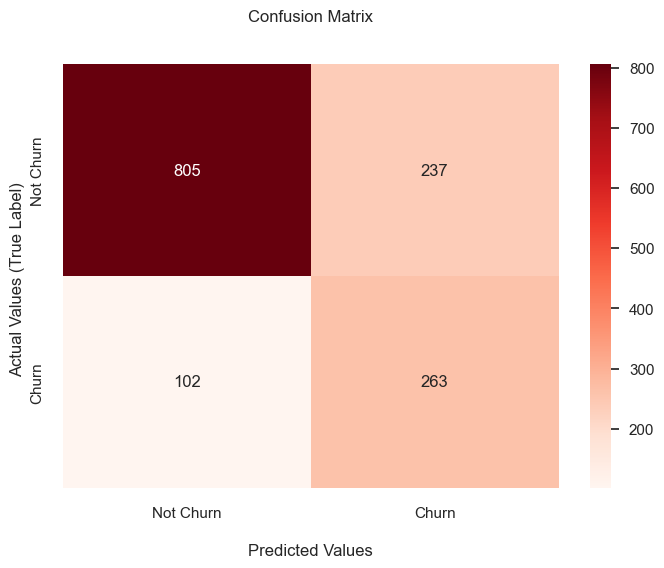

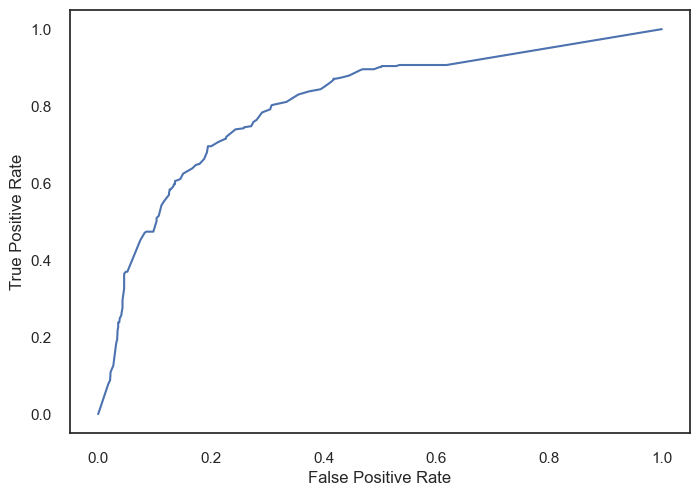

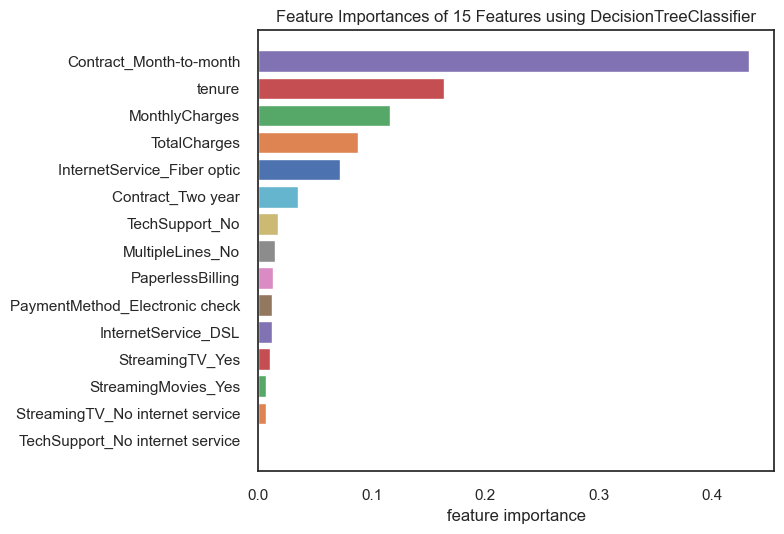

Model name:  RandomForestClassifier
Algorithm: RandomForestClassifier
              precision    recall  f1-score   support

           0     0.8366    0.9040    0.8690      1042
           1     0.6441    0.4959    0.5604       365

    accuracy                         0.7982      1407
   macro avg     0.7404    0.7000    0.7147      1407
weighted avg     0.7867    0.7982    0.7889      1407

Area under the roc curve: 0.6999605605658245 



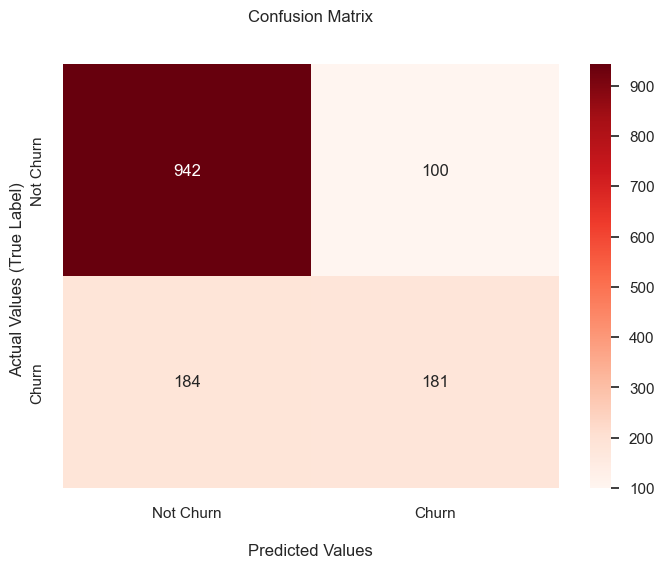

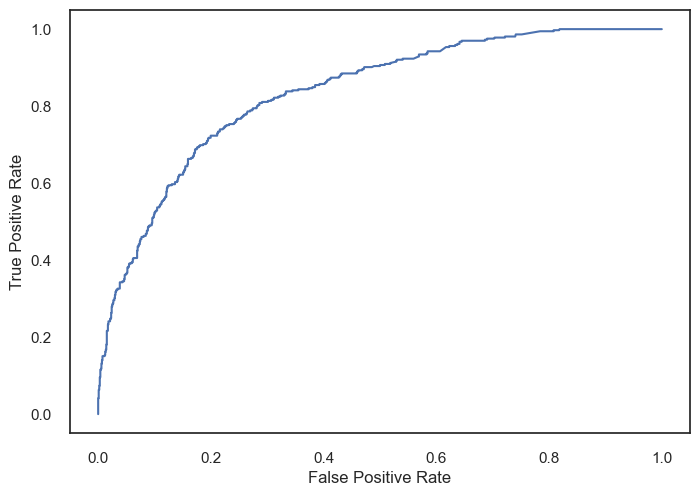

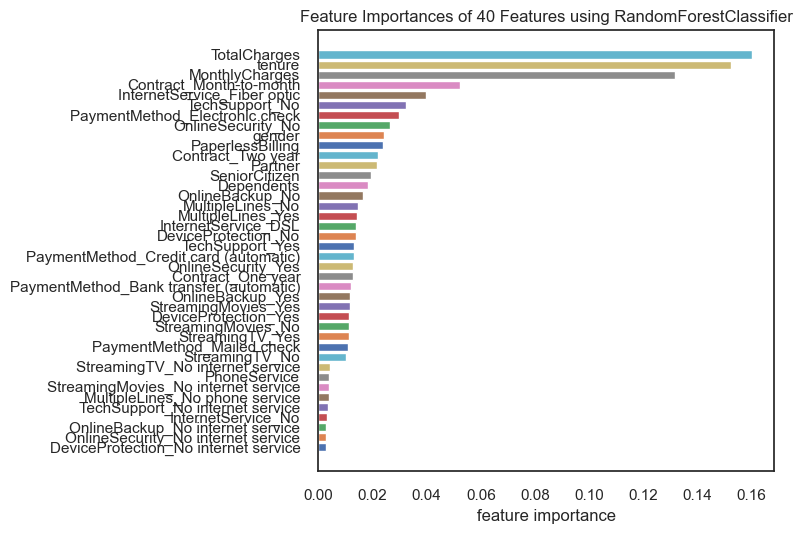

Model name:  RandomForestClassifier (SMOTE)
Algorithm: RandomForestClassifier
              precision    recall  f1-score   support

           0     0.8756    0.8244    0.8492      1042
           1     0.5704    0.6658    0.6144       365

    accuracy                         0.7832      1407
   macro avg     0.7230    0.7451    0.7318      1407
weighted avg     0.7965    0.7832    0.7883      1407

Area under the roc curve: 0.7450648121368286 



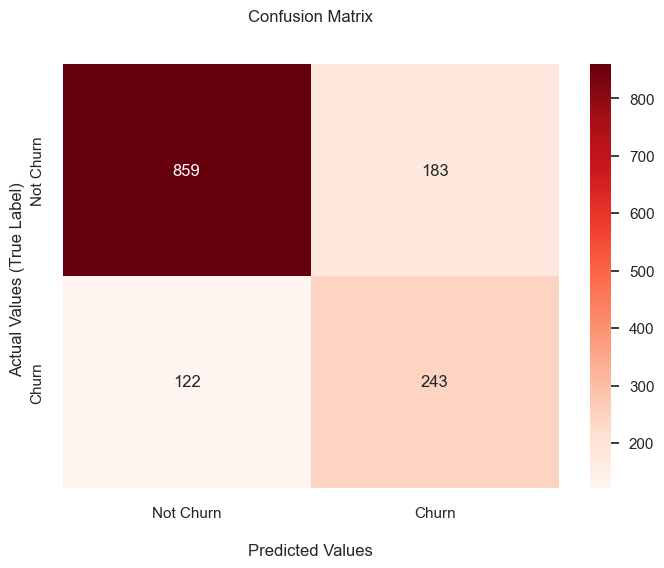

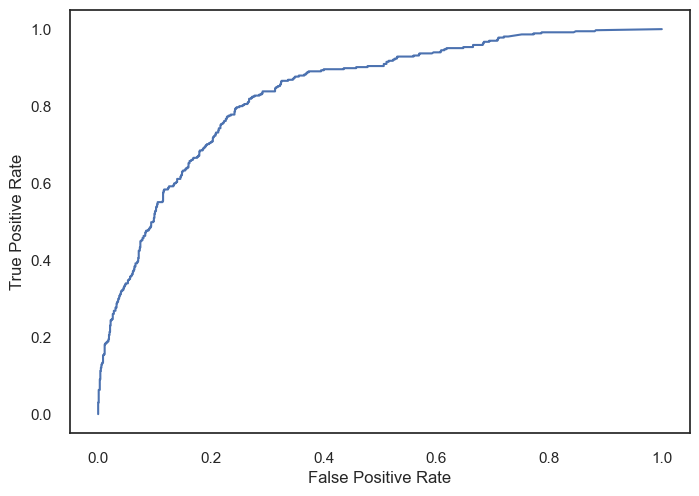

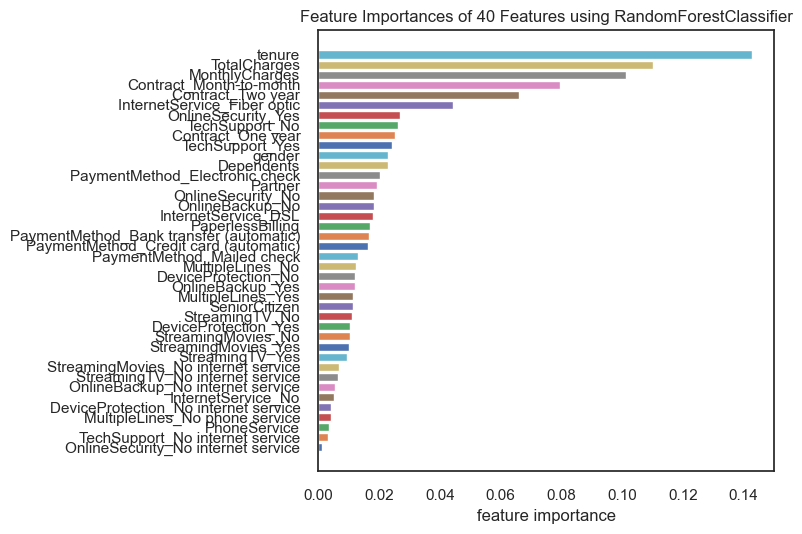

Model name:  RandomForestClassifier (SMOTE RFE)
Algorithm: RandomForestClassifier
              precision    recall  f1-score   support

           0     0.8887    0.8042    0.8443      1042
           1     0.5603    0.7123    0.6273       365

    accuracy                         0.7804      1407
   macro avg     0.7245    0.7583    0.7358      1407
weighted avg     0.8035    0.7804    0.7880      1407

Area under the roc curve: 0.7582757079378434 



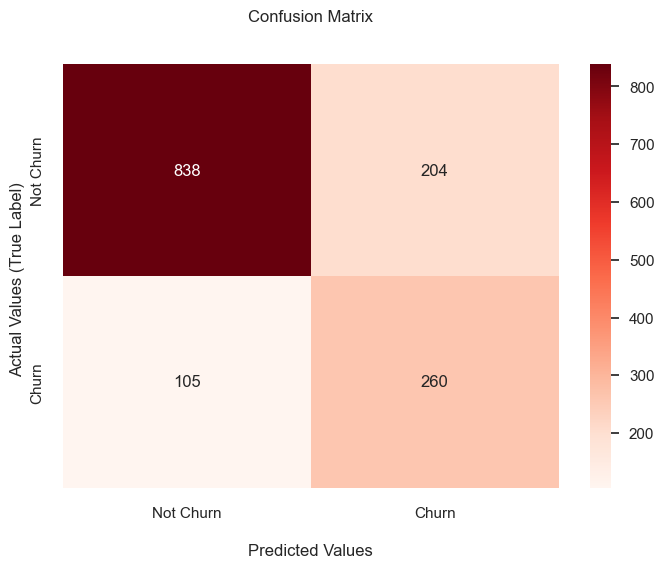

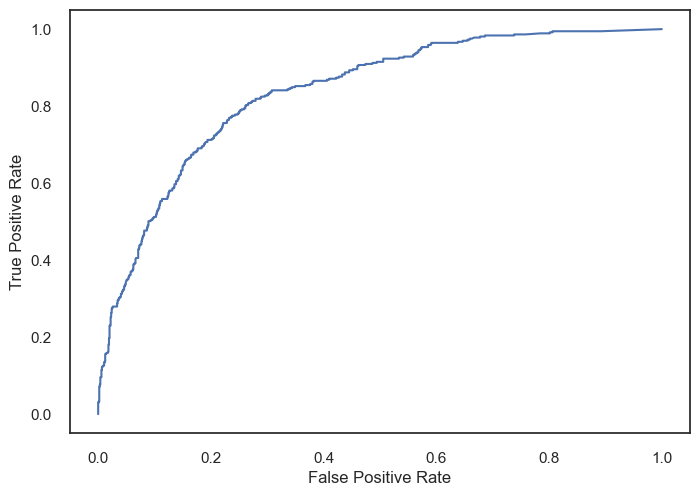

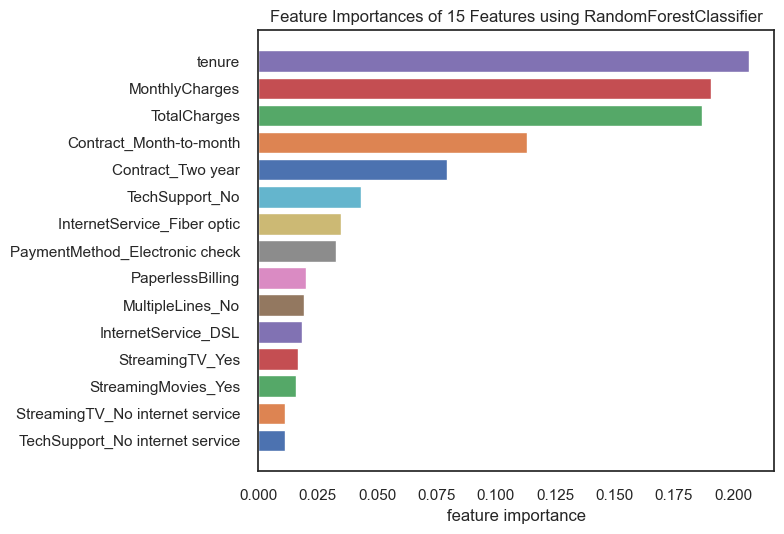

Model name:  SVC (linear)
Algorithm: SVC
              precision    recall  f1-score   support

           0     0.8529    0.9127    0.8818      1042
           1     0.6884    0.5507    0.6119       365

    accuracy                         0.8188      1407
   macro avg     0.7706    0.7317    0.7468      1407
weighted avg     0.8102    0.8188    0.8118      1407

Area under the roc curve: 0.7316764388820235 



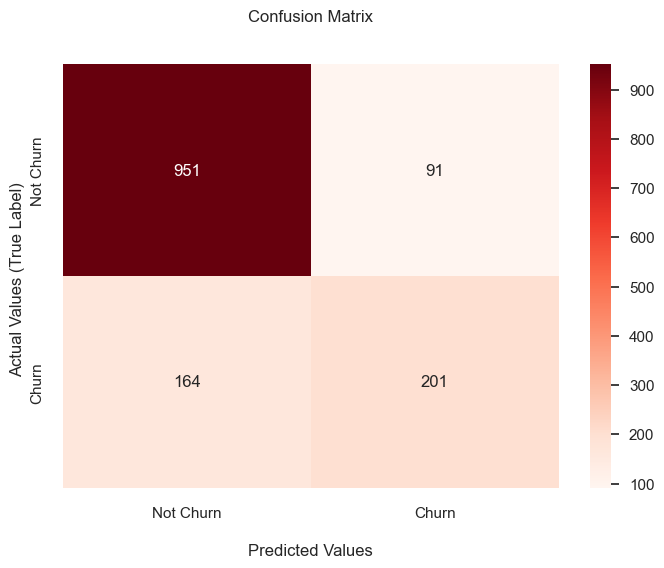

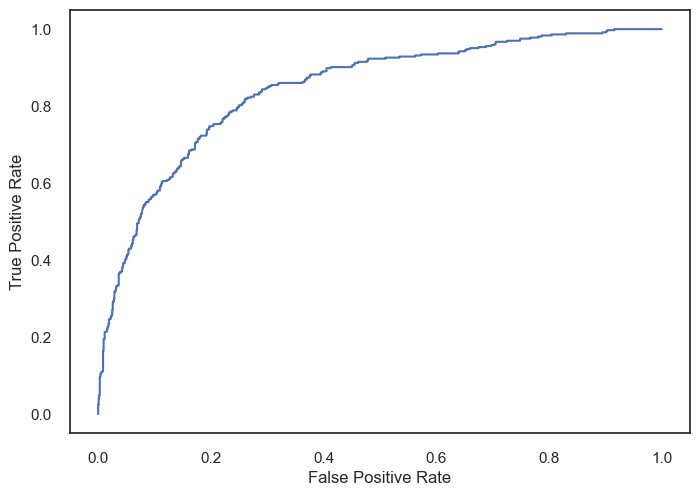

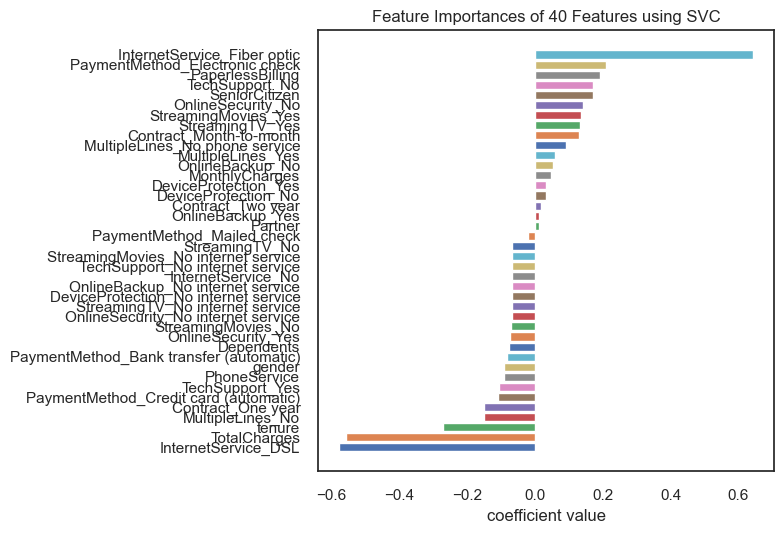

Model name:  SVC (linear) (SMOTE)
Algorithm: SVC
              precision    recall  f1-score   support

           0     0.8876    0.8484    0.8675      1042
           1     0.6156    0.6932    0.6521       365

    accuracy                         0.8081      1407
   macro avg     0.7516    0.7708    0.7598      1407
weighted avg     0.8170    0.8081    0.8116      1407

Area under the roc curve: 0.7707596035022217 



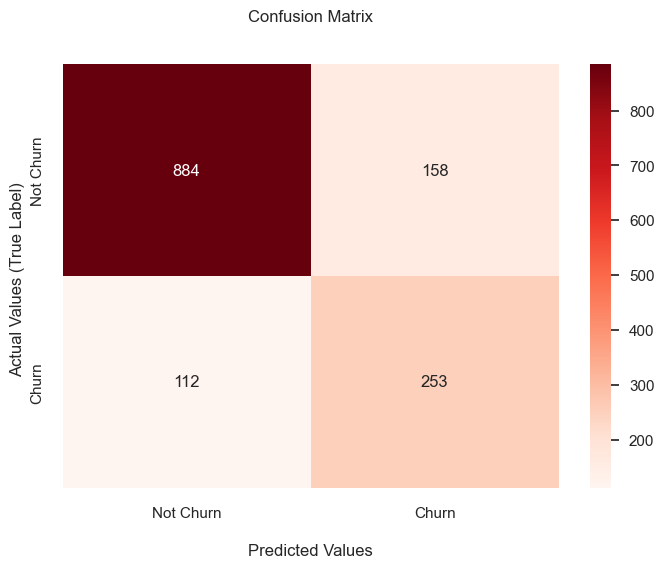

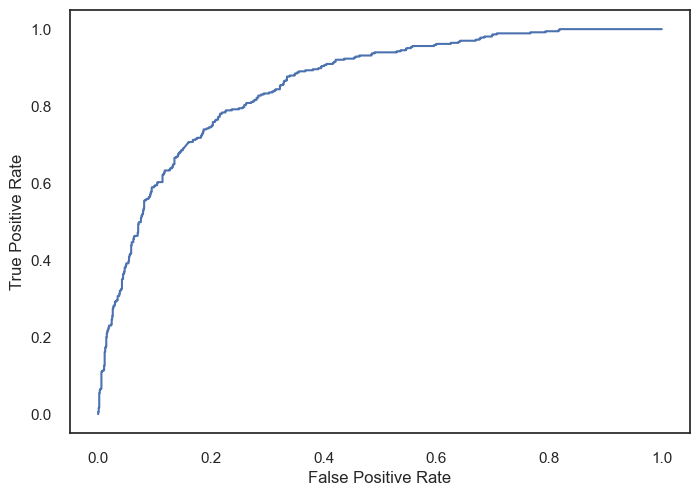

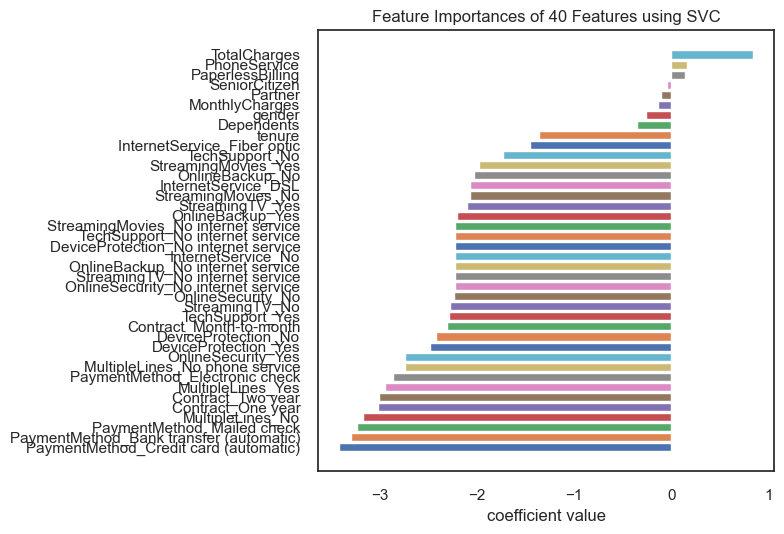

Model name:  SVC (linear) (SMOTE RFE)
Algorithm: SVC
              precision    recall  f1-score   support

           0     0.9207    0.6574    0.7671      1042
           1     0.4615    0.8384    0.5953       365

    accuracy                         0.7043      1407
   macro avg     0.6911    0.7479    0.6812      1407
weighted avg     0.8016    0.7043    0.7225      1407

Area under the roc curve: 0.7478728998501301 



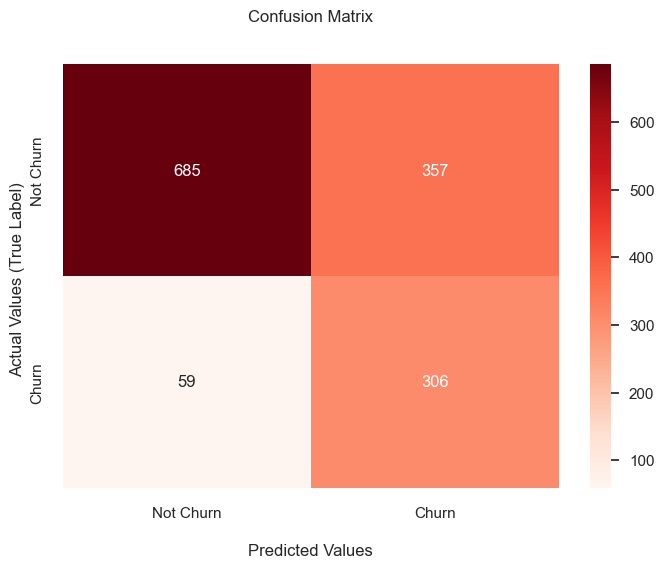

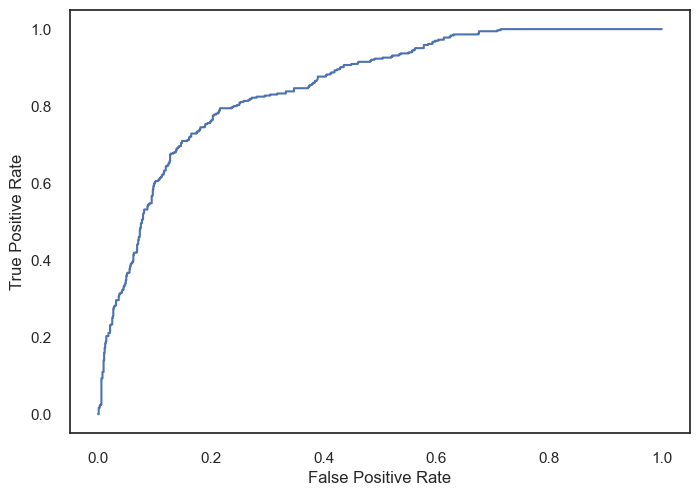

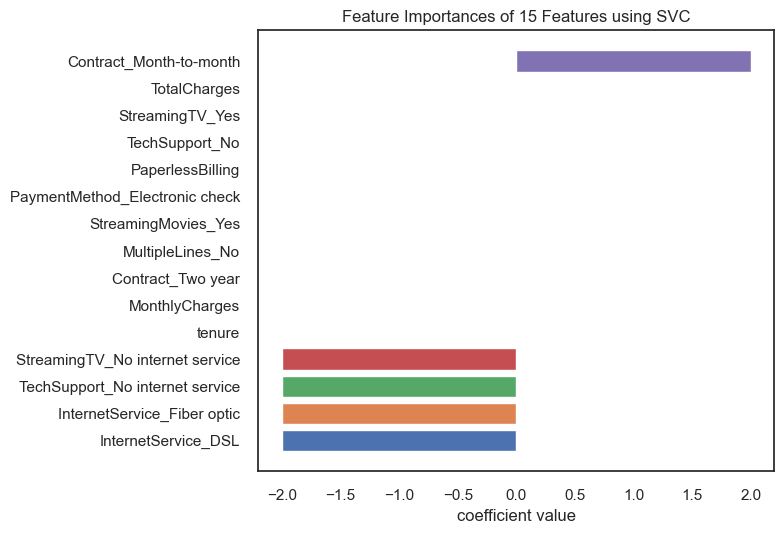

Model name:  AdaBoost
Algorithm: AdaBoostClassifier
              precision    recall  f1-score   support

           0     0.8455    0.9194    0.8809      1042
           1     0.6934    0.5205    0.5947       365

    accuracy                         0.8159      1407
   macro avg     0.7695    0.7200    0.7378      1407
weighted avg     0.8061    0.8159    0.8067      1407

Area under the roc curve: 0.7199668708752924 



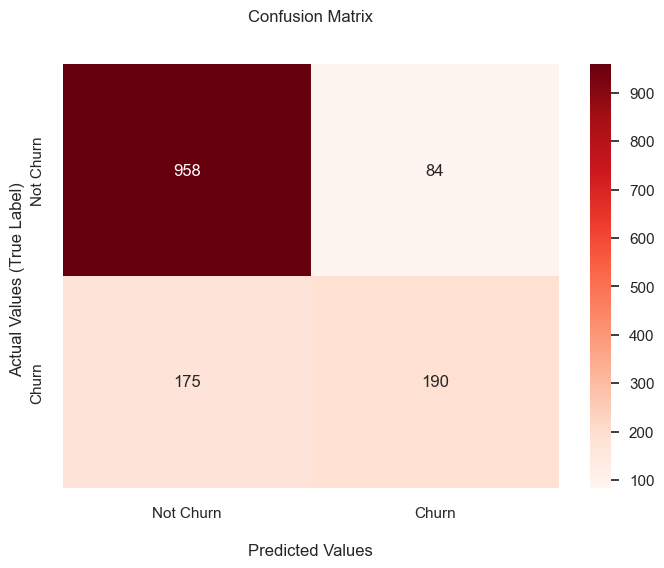

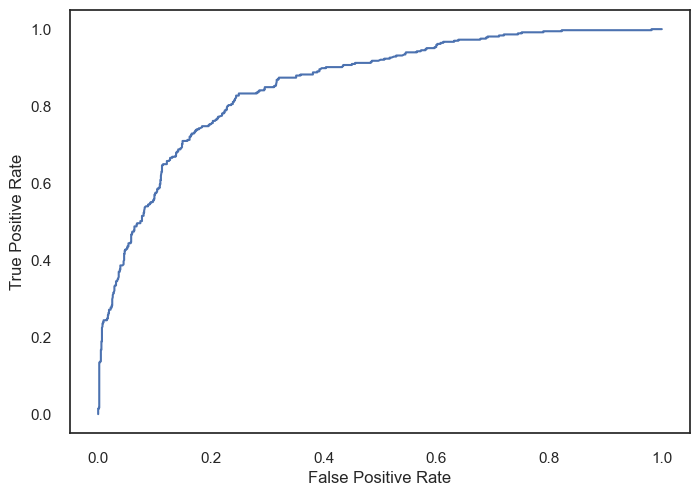

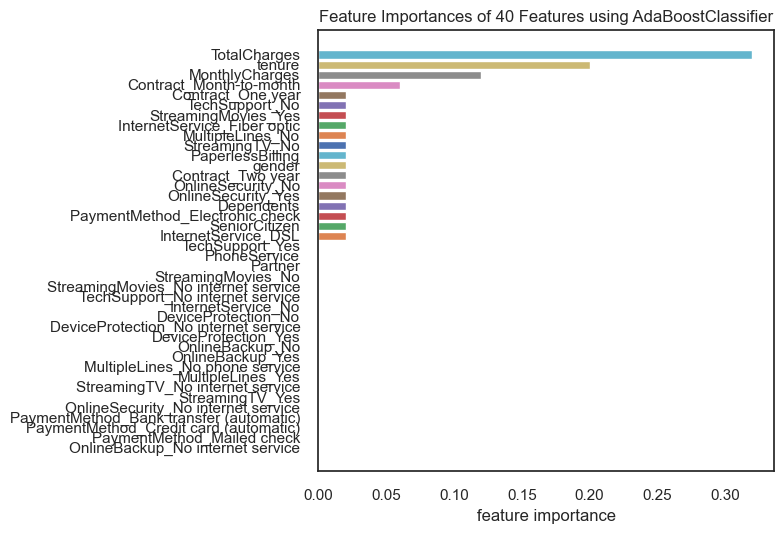

Model name:  AdaBoost (SMOTE)
Algorithm: AdaBoostClassifier
              precision    recall  f1-score   support

           0     0.9016    0.7735    0.8326      1042
           1     0.5400    0.7589    0.6310       365

    accuracy                         0.7697      1407
   macro avg     0.7208    0.7662    0.7318      1407
weighted avg     0.8078    0.7697    0.7803      1407

Area under the roc curve: 0.7662082927983593 



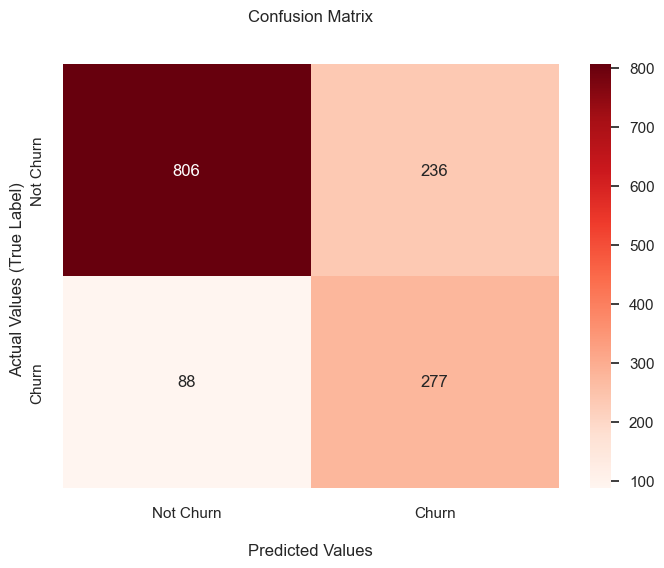

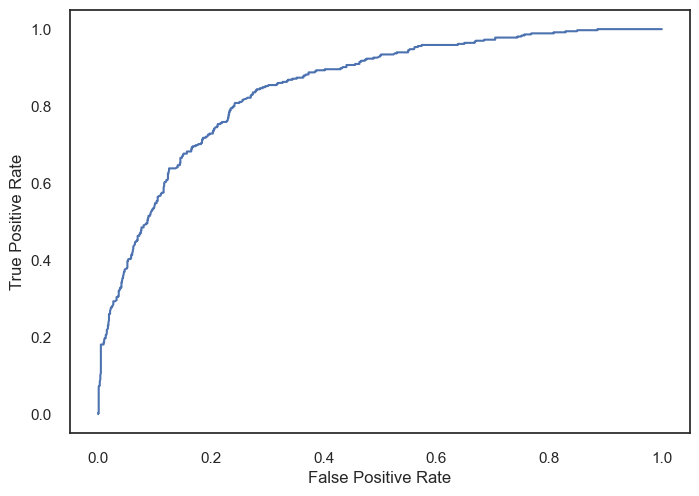

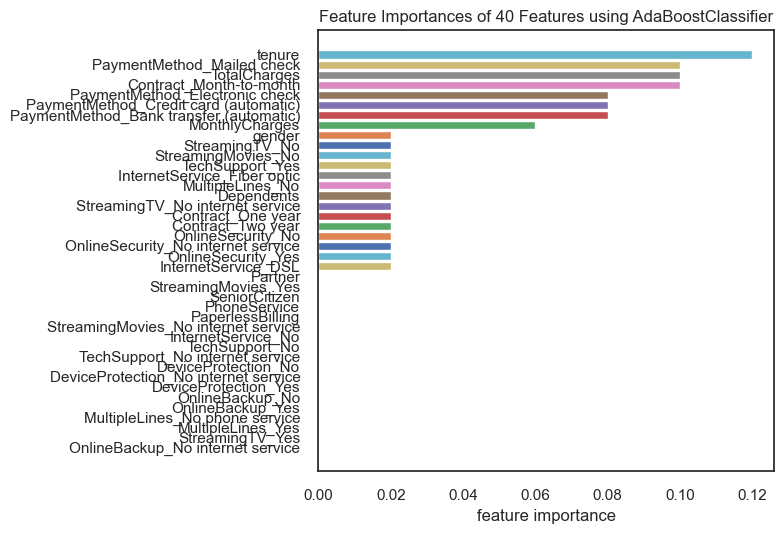

Model name:  AdaBoost (SMOTE RFE)
Algorithm: AdaBoostClassifier
              precision    recall  f1-score   support

           0     0.9304    0.7438    0.8267      1042
           1     0.5348    0.8411    0.6539       365

    accuracy                         0.7690      1407
   macro avg     0.7326    0.7924    0.7403      1407
weighted avg     0.8278    0.7690    0.7818      1407

Area under the roc curve: 0.7924289432860936 



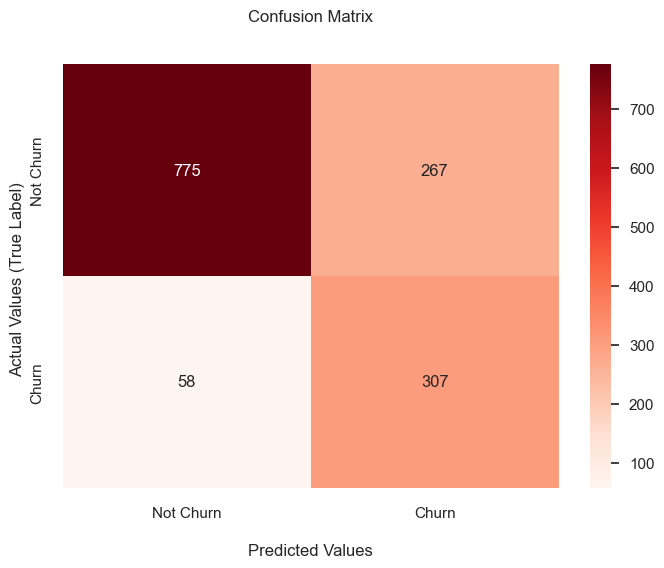

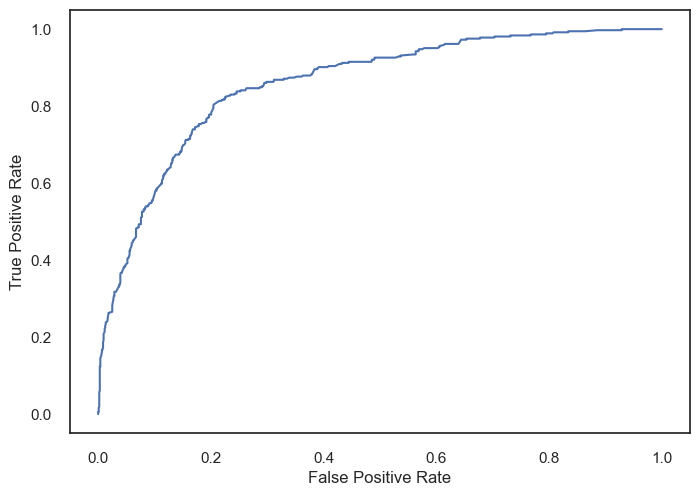

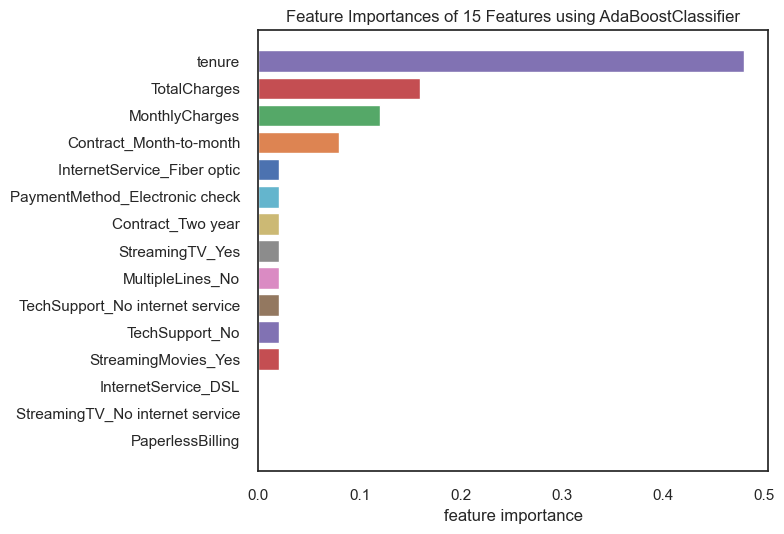

In [25]:
performances_df = ml_classification(show_stat=True)

In [26]:
import plotly.figure_factory as ff # visualization
import plotly.offline as plotly_py # visualization
plotly_py.init_notebook_mode(connected=True) # visualization

# colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

# table = ff.create_table(np.round(performances_df, 4), colorscale=colorscale)
# table.layout.font.size = 10
# # for i in range(len(table.layout.annotations)):
# #     if i == 0:
# #         table.layout.annotations[i].font.size = 10
# #     else:
# #         table.layout.annotations[i].align = 'left'
# plotly_py.iplot(table)

In [27]:
sorted_df = performances_df.sort_values(by=['f1-score'], ascending=False)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

sorted_df.to_csv(path + "/performance.csv", float_format='%.3f')

table = ff.create_table(np.round(sorted_df, 4), colorscale=colorscale)
table.layout.font.size = 10
# for i in range(len(table.layout.annotations)):
#     if i == 0:
#         table.layout.annotations[i].font.size = 10
#     else:
#         table.layout.annotations[i].align = 'left'
plotly_py.iplot(table)

In [28]:
sorted_df = performances_df.sort_values(by=['Roc_auc'], ascending=False)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

table = ff.create_table(np.round(sorted_df, 4), colorscale=colorscale)
table.layout.font.size = 10

# for i in range(len(table.layout.annotations)):
#     if i == 0:
#         table.layout.annotations[i].font.size = 10
#     else:
#         table.layout.annotations[i].align = 'left'
plotly_py.iplot(table)

In [29]:
sorted_df = performances_df.sort_values(by=['Recall'], ascending=False)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

table = ff.create_table(np.round(sorted_df, 4), colorscale=colorscale)
table.layout.font.size = 10

# for i in range(len(table.layout.annotations)):
#     if i == 0:
#         table.layout.annotations[i].font.size = 10
#     else:
#         table.layout.annotations[i].align = 'left'
plotly_py.iplot(table)

In [30]:
sorted_df = performances_df.sort_values(by=['Accuracy'], ascending=False)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

table = ff.create_table(np.round(sorted_df, 4), colorscale=colorscale)
table.layout.font.size = 10

# for i in range(len(table.layout.annotations)):
#     if i == 0:
#         table.layout.annotations[i].font.size = 10
#     else:
#         table.layout.annotations[i].align = 'left'
plotly_py.iplot(table)

In [31]:
sorted_df = performances_df.sort_values(by=['Precision'], ascending=False)
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

table = ff.create_table(np.round(sorted_df, 4), colorscale=colorscale)
table.layout.font.size = 10

# for i in range(len(table.layout.annotations)):
#     if i == 0:
#         table.layout.annotations[i].font.size = 10
#     else:
#         table.layout.annotations[i].align = 'left'
plotly_py.iplot(table)

In [32]:
len(X_test.columns)

40

In [33]:
num_rfe_features_to_select = 15
rfe = RFE(LogisticRegression(max_iter=10000), n_features_to_select=num_rfe_features_to_select, step=1)
rfe = rfe.fit(X_train_original, y_train_original.values.ravel())

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support": rfe.support_,
                        "columns": X_train_original.columns,
                        "ranking": rfe.ranking_,
                       })

cols_rfe = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

In [34]:
cols_rfe

['tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'StreamingMovies_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'MultipleLines_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'InternetService_DSL',
 'InternetService_Fiber optic']

In [35]:
performances_df

,Model,Accuracy,Recall,Precision,f1-score,Roc_auc,Training Time(s)
0,LogisticRegression,0.819474,0.558904,0.686869,0.616314,0.734826,0.027420
0,LogisticRegression (SMOTE),0.805259,0.687671,0.610706,0.646907,0.767060,0.091875
0,LogisticRegression (SMOTE RFE),0.764037,0.827397,0.528897,0.645299,0.784620,0.038599
0,DecisionTreeClassifier,0.776119,0.542466,0.572254,0.556962,0.700216,0.024459
0,DecisionTreeClassifier (SMOTE),0.743426,0.663014,0.504167,0.572781,0.717303,0.035859
0,DecisionTreeClassifier (SMOTE RFE),0.759062,0.720548,0.526000,0.608092,0.746550,0.024546
0,RandomForestClassifier,0.798152,0.495890,0.644128,0.560372,0.699961,0.303593
0,RandomForestClassifier (SMOTE),0.783227,0.665753,0.570423,0.614412,0.745065,0.406027
0,RandomForestClassifier (SMOTE RFE),0.780384,0.712329,0.560345,0.627262,0.758276,0.433096
0,SVC (linear),0.818763,0.550685,0.688356,0.611872,0.731676,7.924742


In [36]:
# 8 rows
exp1_df3 = performances_df[performances_df['Model'].str.contains("RFE") ]
exp1_df3 = exp1_df3.sort_values(by=['f1-score'], ascending=False)
exp1_df3

,Model,Accuracy,Recall,Precision,f1-score,Roc_auc,Training Time(s)
0,AdaBoost (SMOTE RFE),0.769012,0.841096,0.534843,0.653887,0.792429,0.299048
0,LogisticRegression (SMOTE RFE),0.764037,0.827397,0.528897,0.645299,0.784620,0.038599
0,RandomForestClassifier (SMOTE RFE),0.780384,0.712329,0.560345,0.627262,0.758276,0.433096
0,DecisionTreeClassifier (SMOTE RFE),0.759062,0.720548,0.526000,0.608092,0.746550,0.024546
0,SVC (linear) (SMOTE RFE),0.704335,0.838356,0.461538,0.595331,0.747873,21.317393


In [37]:
# 8 rows
exp1_df2 = performances_df[performances_df['Model'].str.contains("SMOTE") & ~performances_df['Model'].str.contains("RFE")]
exp1_df2 = exp1_df2.sort_values(by=['f1-score'], ascending=False)
exp1_df2

,Model,Accuracy,Recall,Precision,f1-score,Roc_auc,Training Time(s)
0,SVC (linear) (SMOTE),0.808102,0.693151,0.615572,0.652062,0.770760,15.030611
0,LogisticRegression (SMOTE),0.805259,0.687671,0.610706,0.646907,0.767060,0.091875
0,AdaBoost (SMOTE),0.769723,0.758904,0.539961,0.630979,0.766208,0.380107
0,RandomForestClassifier (SMOTE),0.783227,0.665753,0.570423,0.614412,0.745065,0.406027
0,DecisionTreeClassifier (SMOTE),0.743426,0.663014,0.504167,0.572781,0.717303,0.035859


In [38]:
# 8 rows
exp1_df1 = performances_df[~performances_df['Model'].str.contains("SMOTE") & ~performances_df['Model'].str.contains("RFE")]
exp1_df1 = exp1_df1.sort_values(by=['f1-score'], ascending=False)

exp1_df1

,Model,Accuracy,Recall,Precision,f1-score,Roc_auc,Training Time(s)
0,LogisticRegression,0.819474,0.558904,0.686869,0.616314,0.734826,0.027420
0,SVC (linear),0.818763,0.550685,0.688356,0.611872,0.731676,7.924742
0,AdaBoost,0.815920,0.520548,0.693431,0.594679,0.719967,0.284446
0,RandomForestClassifier,0.798152,0.495890,0.644128,0.560372,0.699961,0.303593
0,DecisionTreeClassifier,0.776119,0.542466,0.572254,0.556962,0.700216,0.024459


Model name:  AdaBoostClassifier (SMOTE RFE)
Algorithm: AdaBoostClassifier
              precision    recall  f1-score   support

           0     0.9304    0.7438    0.8267      1042
           1     0.5348    0.8411    0.6539       365

    accuracy                         0.7690      1407
   macro avg     0.7326    0.7924    0.7403      1407
weighted avg     0.8278    0.7690    0.7818      1407

Area under the roc curve: 0.7924289432860936 



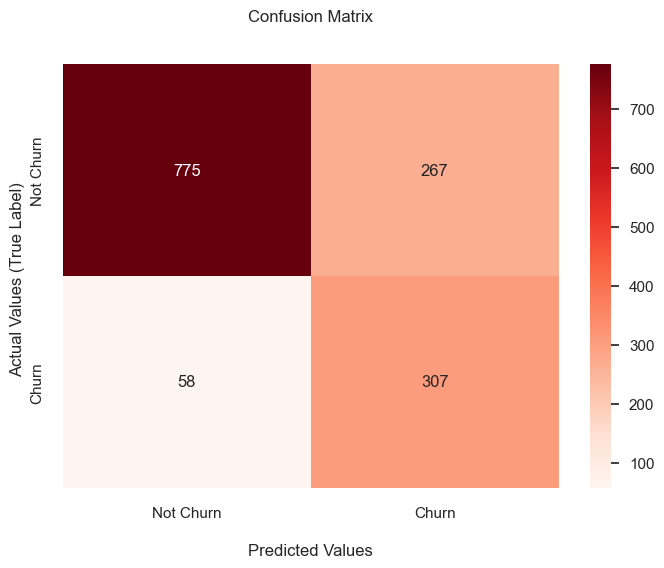

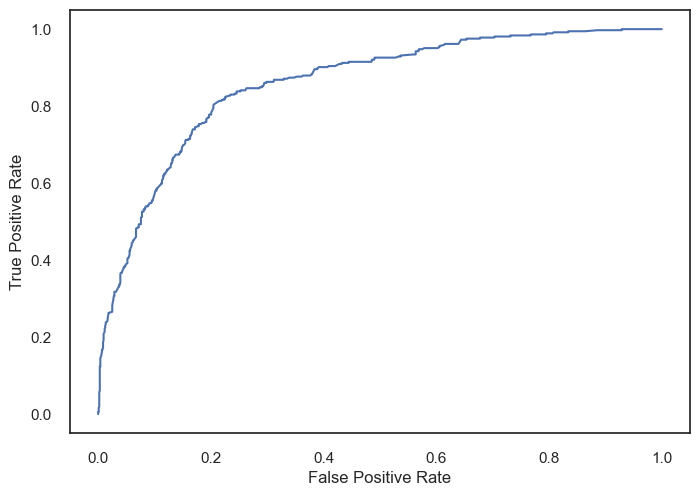

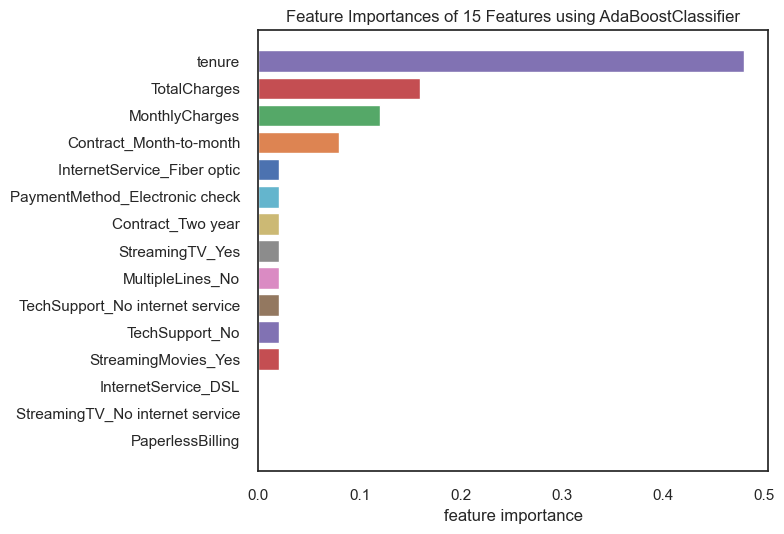

In [39]:
random_state = 50
model = AdaBoostClassifier(random_state=random_state)
num_rfe_features_to_select = 15
rfe = RFE(LogisticRegression(max_iter=10000), n_features_to_select=num_rfe_features_to_select, step=1)
rfe = rfe.fit(X_train_original, y_train_original.values.ravel())

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support": rfe.support_,
                        "columns": X_train_original.columns,
                        "ranking": rfe.ranking_,
                       })

cols_rfe = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
name = type(model).__name__ + ' (SMOTE RFE)'
df = model_performance(model, X_train_smote[cols_rfe], y_train_smote, X_test[cols_rfe], y_test, name, show_stat=True, use_save_model=False)
            